## Analysis on watcher and follower on bitbucket
- Firstly, I collect the number of followers for each user, and then the number of watchers for each repo. 
- Secondly, I calculate the number of watchers for each user by summing up all repos' watchers of that user.
- So there should be co-watcher-follower for each user. Assume ratio: co-watcher-follower/watcher obeys normal distribution. Assume mean is 0.5.
- Do a T test on mean. Found that 0.5 can't be accepted.
  1. First plot include a big noise(too many zero value)
  2. After clearing the zero value in dataset, I plot it in second figure.
- Then I try to see the relation among follower watcher and co-watcher-follower.
  1. Although correlation is aroung 0.5, the model doesn't work well.(linear regression)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.008953 0.000000 1.000000 

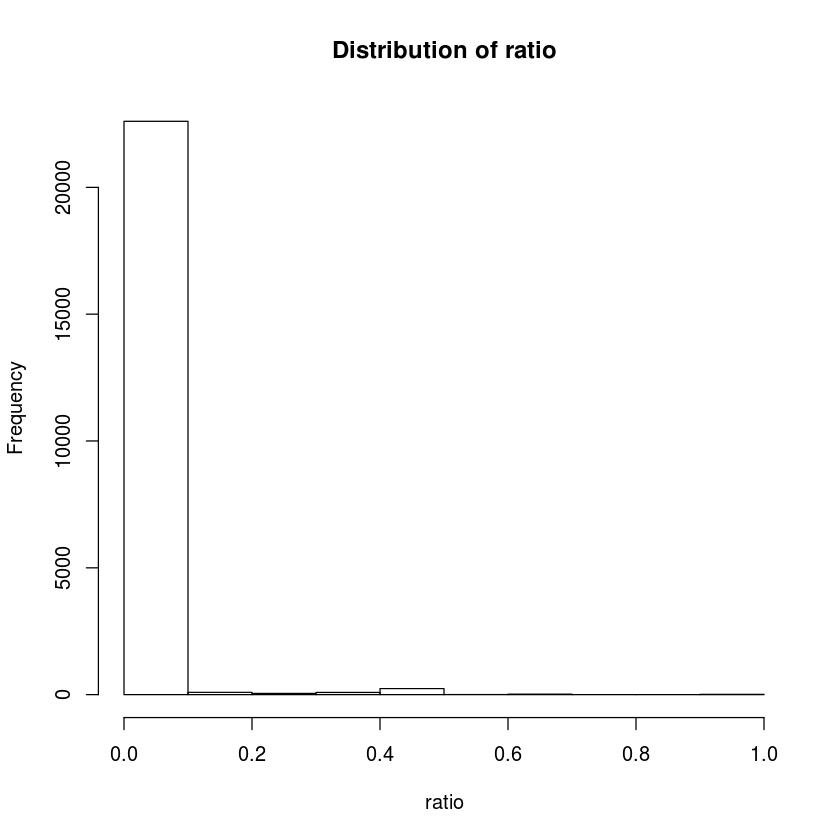

[1] 0.008953377
[1] -1157.903
[1] 0


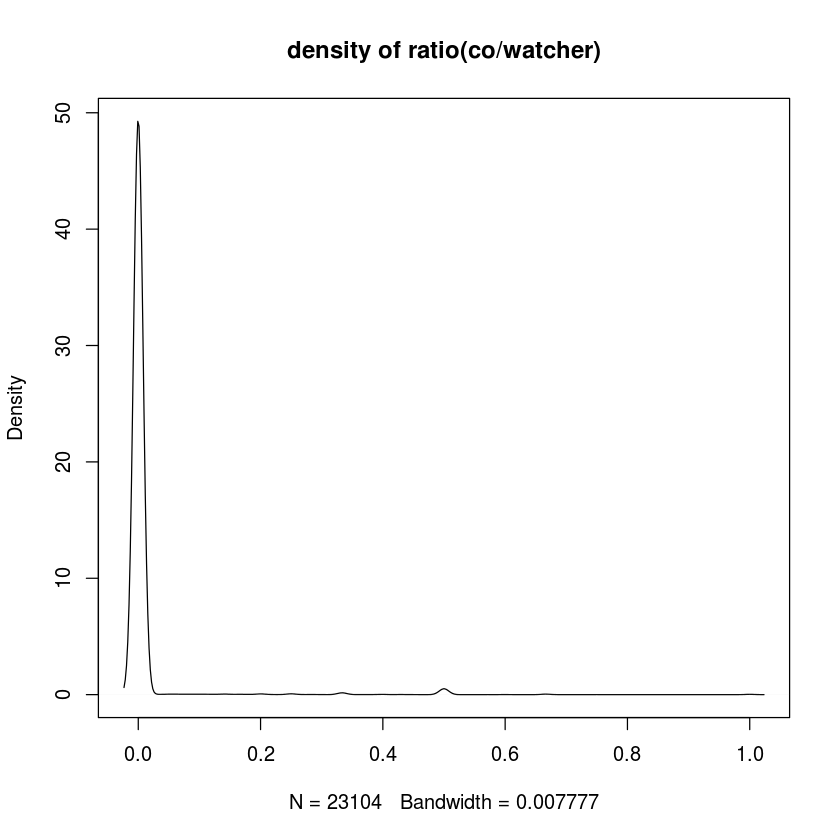

In [10]:
w1 <- read.csv(file="data_bitbucket_for_R.csv",sep=",",head=TRUE)
p = 0.5
watch_count = w1$watcher_count
co_count = w1$co_fo_wa_count
sample = co_count/watch_count
summary(sample)
hist(sample,breaks=10,main="Distribution of ratio",xlab="ratio")
plot(density(sample),main="density of ratio(co/watcher)")
n = length(sample)
print(mean(sample))
T = (mean(sample)-p)/(sd(sample)/sqrt(n))
print(T)
print(2 * pt(T,df=n-1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01961 0.20000 0.40000 0.36810 0.50000 1.00000 

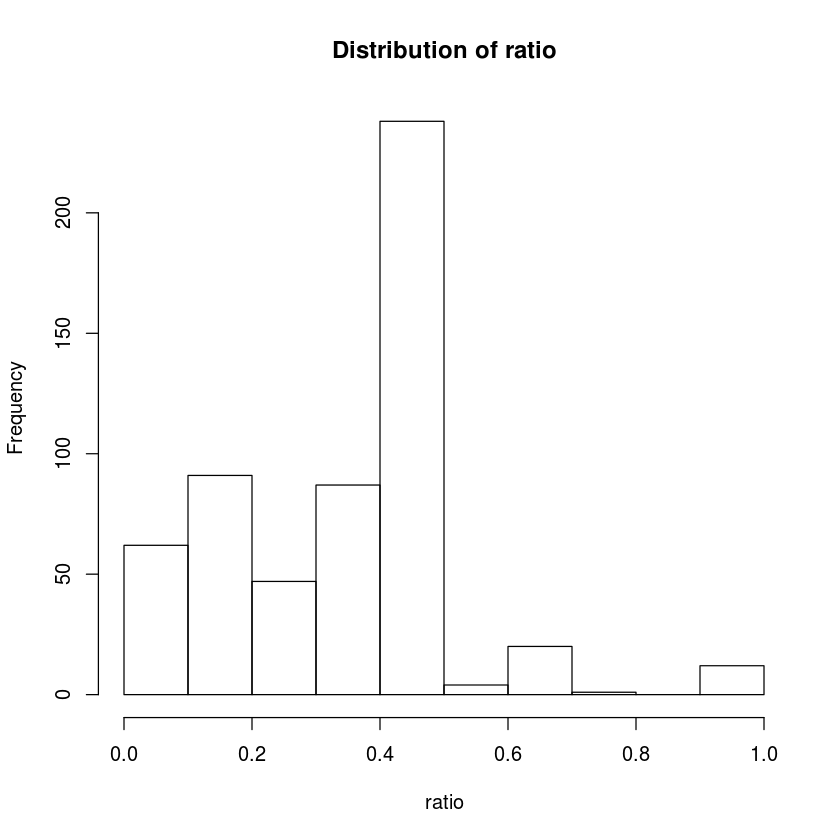

[1] 0.3680762
[1] 0.1967161
[1] -15.89833
[1] 2.949819e-47
[1] 1.922888


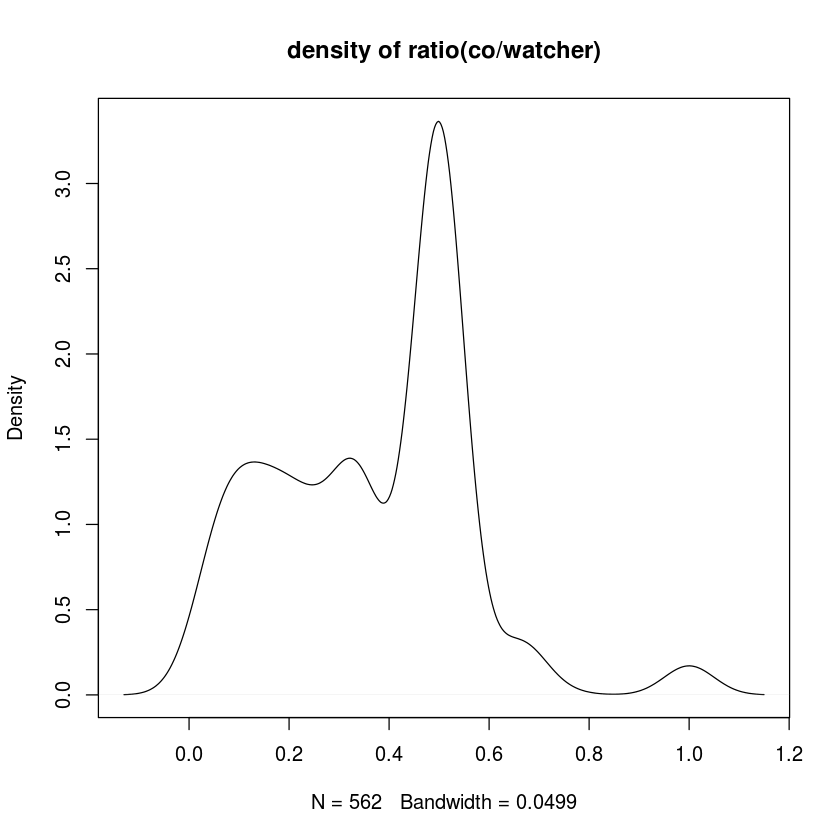

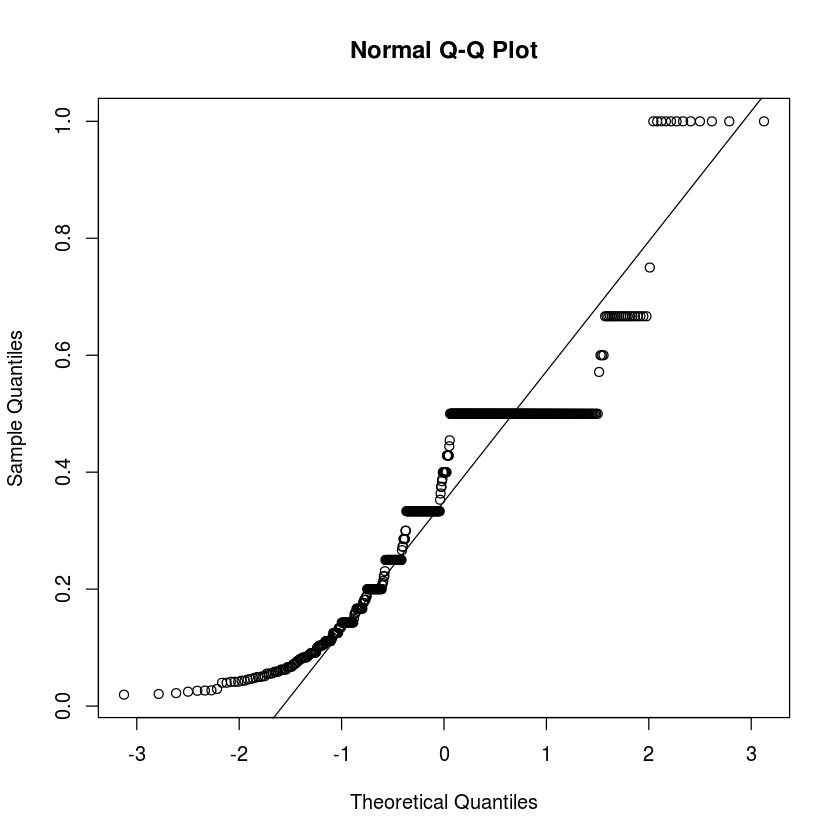

In [5]:
w1 <- read.csv(file="data_bitbucket_filter_for_R.csv",sep=",",head=TRUE)
p = 0.5
watch_count = w1$watcher_count
co_count = w1$co_fo_wa_count
sample = co_count/watch_count
summary(sample)
hist(sample,breaks=10,main="Distribution of ratio",xlab="ratio")
plot(density(sample),main="density of ratio(co/watcher)")
n = length(sample)
print(mean(sample))
print(sd(sample))
T = (mean(sample)-p)/(sd(sample)/sqrt(n))
print(T)
print(2 * pt(T,df=n-1))
print(qt(0.9725,df=n-1))
qqnorm(sample)
qqline(sample)

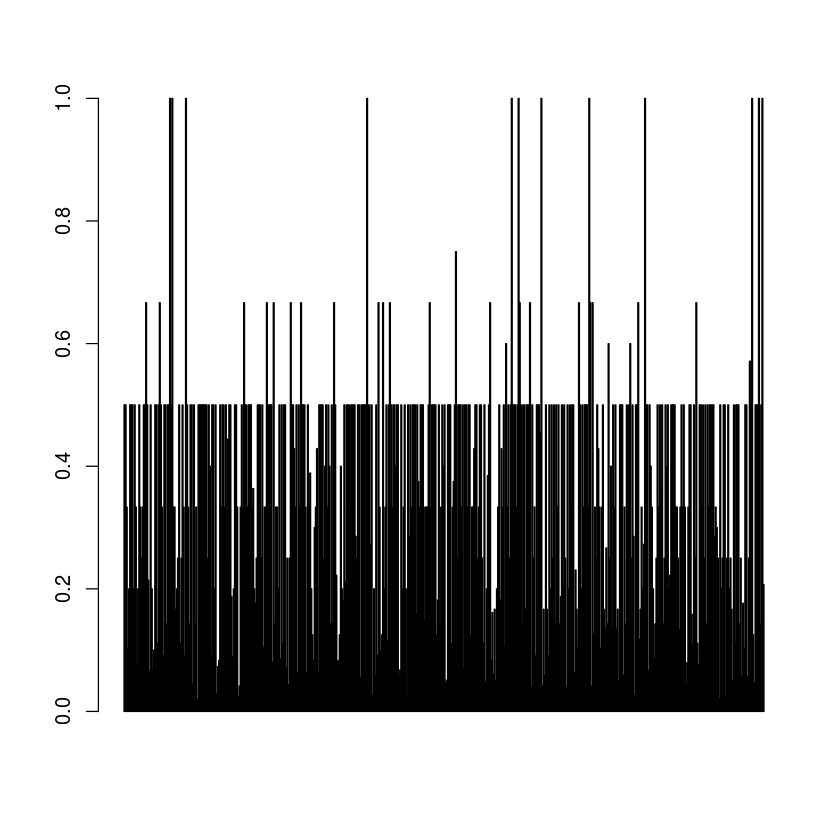

In [10]:
barplot(sample)


Call:
lm(formula = follow_count ~ watch_count)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.343  -2.397  -1.483   0.603  61.483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.007238   0.290290   10.36   <2e-16 ***
watch_count 0.195079   0.007444   26.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.605 on 560 degrees of freedom
Multiple R-squared:  0.5508,	Adjusted R-squared:   0.55 
F-statistic: 686.7 on 1 and 560 DF,  p-value: < 2.2e-16


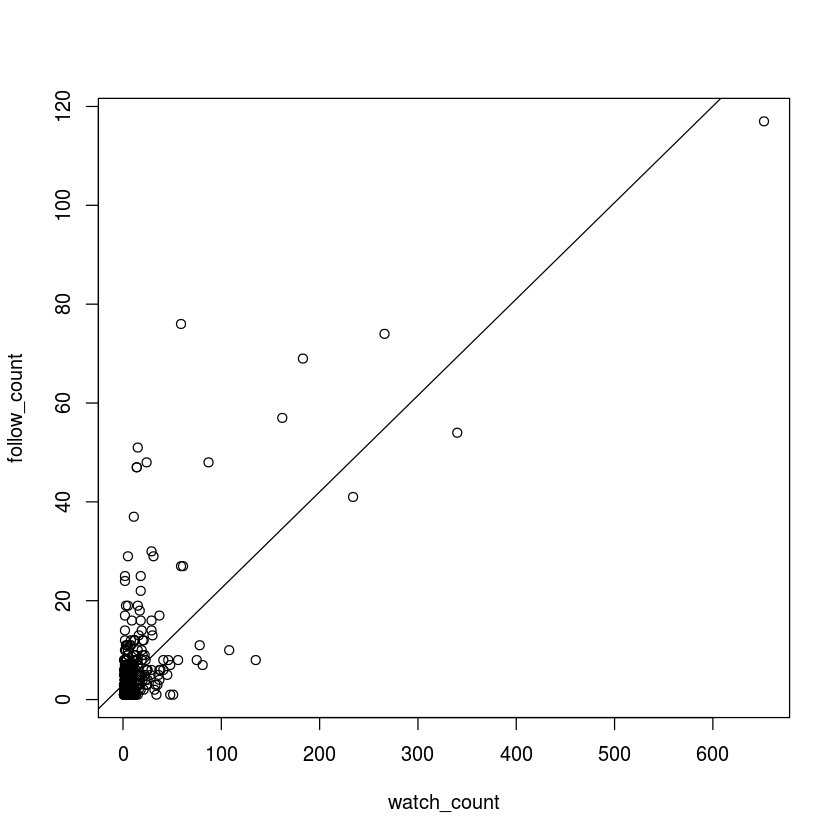

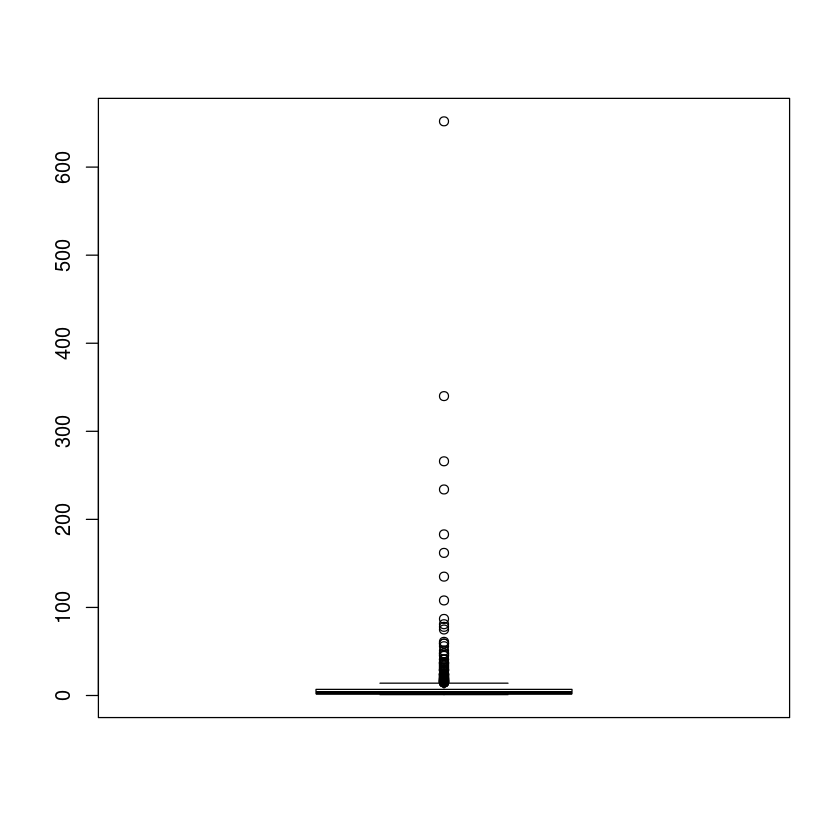

,watch_count,follow_count,co_count
watch_count,1.0000000,0.4848426,0.6164534
follow_count,0.4848426,1.0000000,0.5713809
co_count,0.6164534,0.5713809,1.0000000


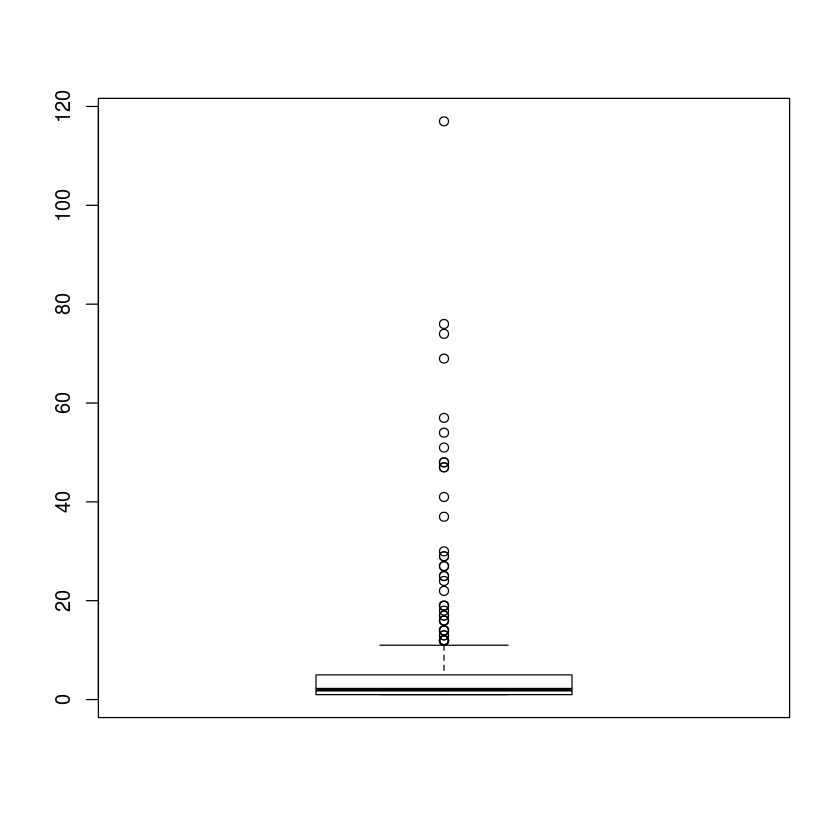

In [1]:
w1 <- read.csv(file="data_bitbucket_filter_for_R.csv",sep=",",head=TRUE)
#p = 0.5
watch_count = w1$watcher_count
follow_count = w1$follower_count
co_count = w1$co_fo_wa_count
plot(watch_count,follow_count)
fit <- lm(follow_count~watch_count)
summary(fit)
abline(fit)

boxplot(watch_count)
boxplot(follow_count)
cor(cbind(watch_count,follow_count,co_count),method="spearman")